<a href="https://colab.research.google.com/github/Dipshakti-Rai/Traffic-Signal-Image-Classification-with-CNN/blob/main/Traffic%20Signal%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models

In [3]:
current_path='/content/drive/MyDrive/Datasets_Traffic Signal'
train_path,test_path="Train","Test"

In [4]:
#loading data from train folder

In [5]:
data = []
labels = []
classes = 43
for i in range(classes):
  path=current_path + '/Train/' +str(i)
  images=os.listdir(path)
  for image in images:
    try:
     img=cv.imread(path + '/' + image)
     img= cv.resize(img, (32, 32))
     img=np.array(img)
     data.append(img)
     labels.append(i)
    except:
      print("Error")

In [6]:
# Normalize pixel values to 0 and 1

In [7]:
data=np.array(data) 
labels=np.array(labels)
data=data/255            
print(data.shape)
print(labels.shape)

(39239, 32, 32, 3)
(39239,)


Text(0, 0.5, 'Number of images')

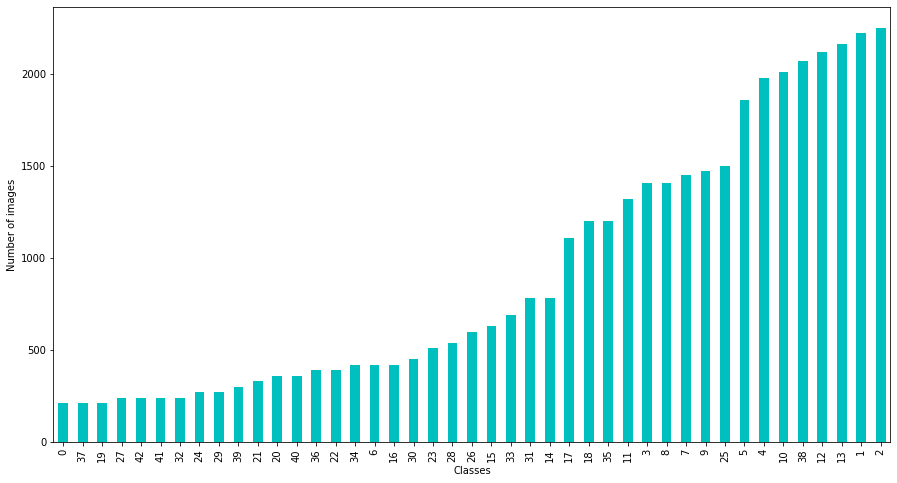

In [8]:
# number of images in each class
import seaborn as sns
dict = {}
for folder in os.listdir(current_path + '/Train/'):
    dict[folder] = len(os.listdir(current_path + '/Train/'+'/' + folder))

data_df= pd.Series(dict)
plt.figure(figsize = (15, 8))
data_df.sort_values().plot(kind = 'bar', color='c')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [9]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.3)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
#one hot encoding

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [13]:
X_train.shape
y_train.shape

(27467, 43)

In [14]:
#checking number of images in each class

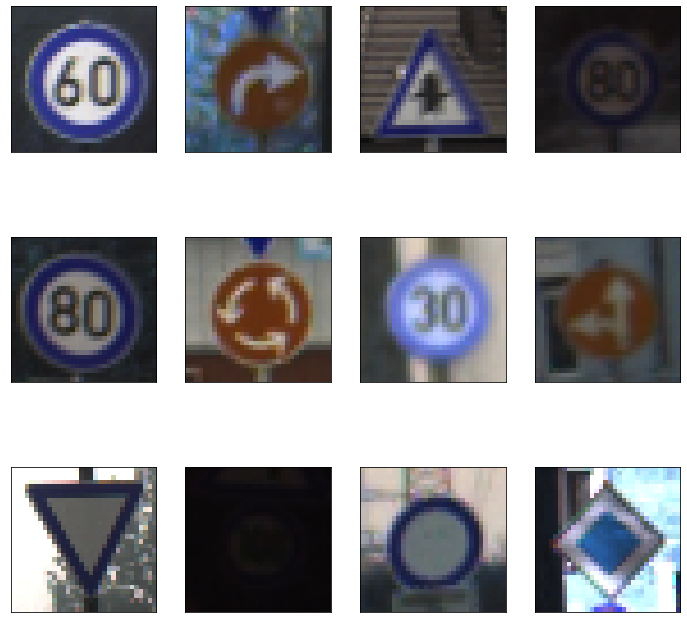

In [15]:
plt.figure(figsize=(12,12))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
plt.show()

In [16]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [17]:
# Building convolution model
# First initializing with sequential layer
# Added 32 filters of size 3*3 and applying relu as activation function
# After convoution layer added Maxpooling layer of 2*2 matrix
# 25% percent of neural network gets deactivated
# Again applying convolution layer(64 filters of size 3*3),maxpooling layer and dropout

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate = 0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate = 0.25))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [20]:
#faltten entire layer

In [21]:
model.add(layers.Flatten())

In [22]:
#Added hidden layer of 200 dense neuron and 43 output layer

In [23]:
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(43, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [25]:
#import tensorflow
#opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
#Using adam optimizer

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [28]:
# setting up early stopping

In [29]:
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [30]:
# Training the model and evaluating its performance

In [31]:
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test, y_test),batch_size=10,callbacks=early_stoping)
history

Epoch 1/1000
2747/2747 [==============================] - 24s 5ms/step - loss: 1.1310 - accuracy: 0.6719 - val_loss: 0.2182 - val_accuracy: 0.9477
Epoch 2/1000
2747/2747 [==============================] - 13s 5ms/step - loss: 0.2810 - accuracy: 0.9122 - val_loss: 0.0923 - val_accuracy: 0.9805


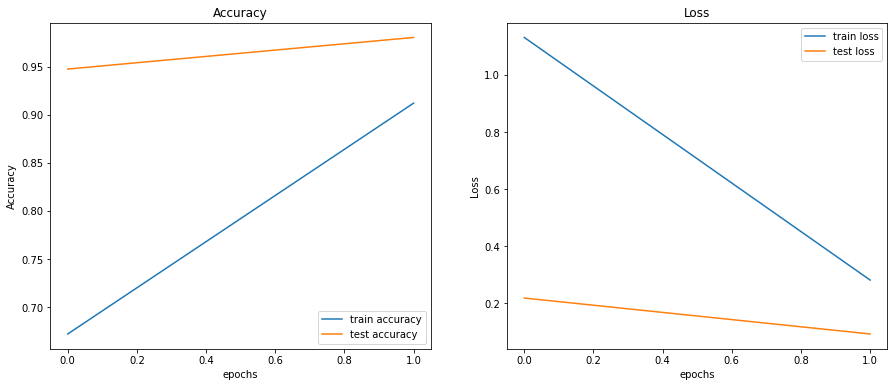

In [32]:
fig, (ax1, ax2)  = plt.subplots(1,2,figsize=(15,6))
ax1.plot(history.history['accuracy'], label= 'train accuracy')
ax1.plot(history.history['val_accuracy'], label= 'test accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label= 'train loss')
ax2.plot(history.history['val_loss'], label= 'test loss')
ax2.set_title('Loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')
ax2.legend()
